# Denoising por filtrado espacial

In [16]:
import cv2
import matplotlib.pyplot as plt
import os
from stat_noise_estimation import load_stat_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Para cada imagen, vamos a aplicar un filtro gaussiano cuya desviación estándar se corresponda con la del ruido estimado por análisis de ROI. 

In [17]:
roi_data_dir = 'infosaves'
data_dict, _ = load_stat_data(roi_data_dir)
image_dir = 'PAIByB-2'

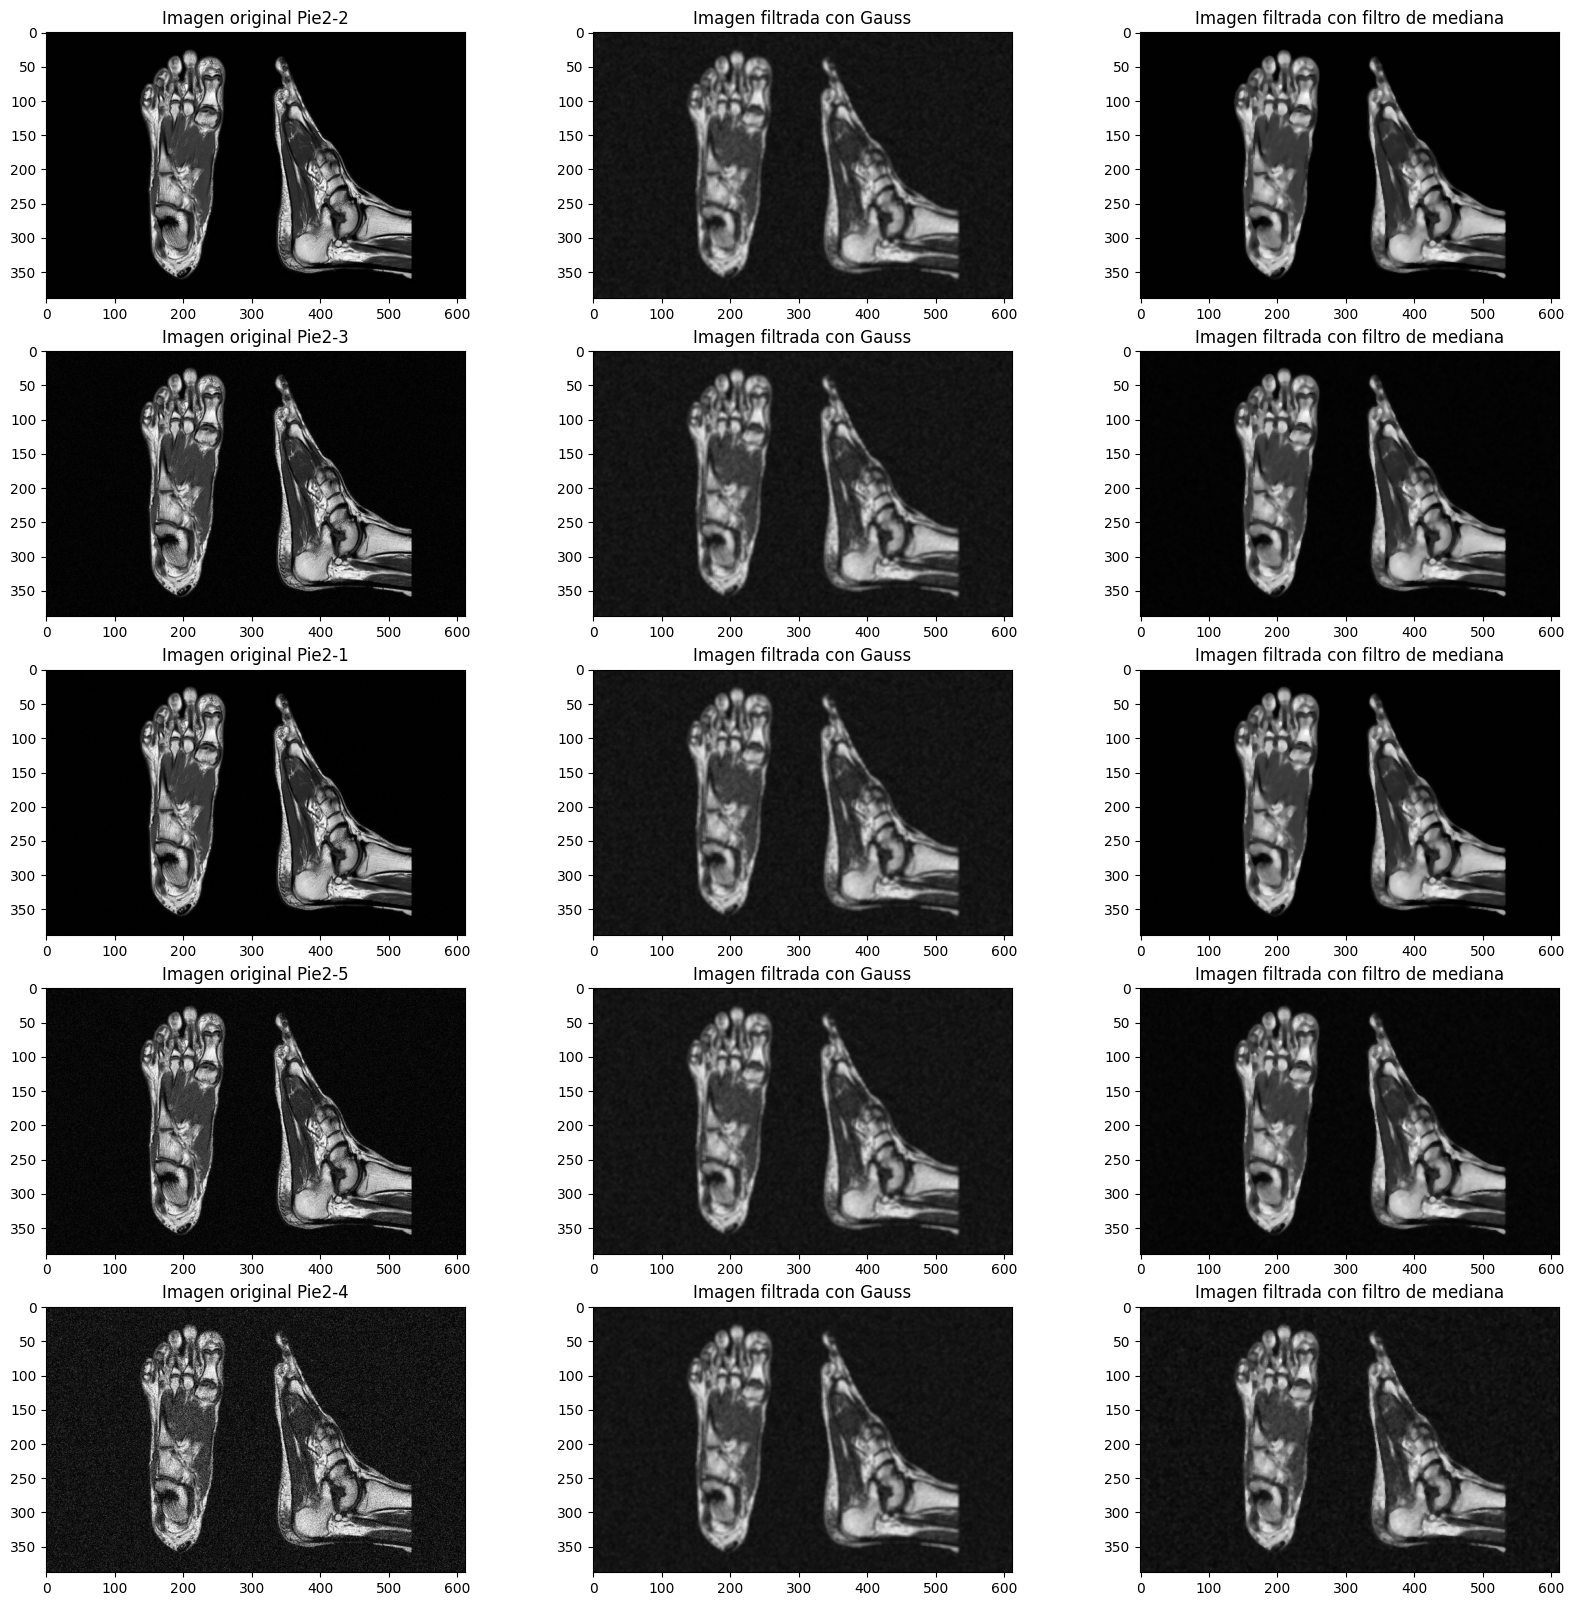

In [18]:
paths = os.listdir(image_dir)
fig, axs = plt.subplots(len(paths), 3, figsize=(20, 20))
output_gauss = 'denoised_img/gauss_denoising'
output_median = 'denoised_img/median_denoising'

for i, image_path in enumerate(paths):
    raw_name = image_path.split('.')[0]
    sigma = data_dict[raw_name]['desv_est']
    img = cv2.imread(os.path.join(image_dir, image_path), cv2.IMREAD_GRAYSCALE)
    
    gauss_image = cv2.GaussianBlur(img, (5, 5), sigmaX=sigma, sigmaY=sigma)
    median_image = cv2.medianBlur(img, 5)
    
    axs[i, 0].imshow(img, vmin=0, vmax=255, cmap='gray')
    axs[i, 0].set_title(f'Imagen original {raw_name}')
    axs[i, 1].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
    axs[i, 1].set_title(f'Imagen filtrada con Gauss')
    axs[i, 2].imshow(median_image, cmap='gray', vmin=0, vmax=255)
    axs[i, 2].set_title(f'Imagen filtrada con filtro de mediana')
    
    cv2.imwrite(os.path.join(output_median, f"{raw_name}_median.png"), median_image)
    cv2.imwrite(os.path.join(output_gauss, f"{raw_name}_gauss.png"), gauss_image)
    
plt.show()